# CHEC-S pixel positions, 3 mm pixels

First import NumPy and PyPlot. Import 3D plotting routines. Make sure plots are produced in line.Make sure plots are produced in line.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

Define pixel sizes etc. SiPM pixel size 3 $\times$ 3 mm$^2$. Interpixel, inter-module gaps etc. as below. All done assuming flat focal surface at this point.

In [2]:
nPixM = 16 # number of pixels on the side of a module
nMod = 6 # number of modules along camera transverse (x) axis
nModQ = int(nMod/2)
nPixQ = nModQ*nPixM
wPixX = 0.003 # pixel x width (m)
gPixX = 0.0002 # inter pixel gap (m)
gModX = 0.0018 # gap between modules (m)
wPixY = 0.003 # pixel x width (m)
gPixY = 0.0002 # inter pixel gap (m)
gModY = 0.0018 # gap between modules (m)
#
# width of module is width of all the pixels plus gaps
wModX = nPixM*wPixX+(nPixM+1)*gPixX
wModY = nPixM*wPixY+(nPixM+1)*gPixY
#
# active width of camera along x or y is width of all modules plus gaps, no gaps at outer edges!
# radius is half this width, choose max and min of x any y directions appropriately
rCamMinX = (nMod*wModX + (nMod - 1)*gModX - 2.0*gPixX)/2.0
rCamMinY = (nMod*wModY + (nMod - 1)*gModY - 2.0*gPixY)/2.0
rCamMin = np.minimum(rCamMinX,rCamMinY)
#
# maximum radius is larger than on axis as it is two modules above x axis (and  along x axis)
rCamMax = np.maximum(rCamMinX,rCamMinY)*np.sqrt(3.0**2 + 2**2)/3.0
#
print("Number of pixels {:1d}, pixel width x {:.4f} (m), inter-pixel gap x {:.5f} (m)."\
      .format(nPixM,wPixX,gPixX))
print("Number of pixels {:1d}, pixel width y {:.4f} (m), inter-pixel gap y {:.5f} (m)."\
      .format(nPixM,wPixY,gPixY))
print("Number of modules {:1d}, module width x {:.4f} (m), inter-module gap x {:.4f} (m)."\
      .format(nMod,wModX,gModX))
print("Number of modules {:1d}, module width y {:.4f} (m), inter-module gap y {:.4f} (m)."\
      .format(nMod,wModY,gModY))
print("Minimum sensitive radius {:.3f} (m), maximum sensitive radius {:.3f} (m)."\
      .format(rCamMin,rCamMax))

Number of pixels 16, pixel width x 0.0030 (m), inter-pixel gap x 0.00020 (m).
Number of pixels 16, pixel width y 0.0030 (m), inter-pixel gap y 0.00020 (m).
Number of modules 6, module width x 0.0514 (m), inter-module gap x 0.0018 (m).
Number of modules 6, module width y 0.0514 (m), inter-module gap y 0.0018 (m).
Minimum sensitive radius 0.159 (m), maximum sensitive radius 0.190 (m).


Now calculate positions of centres of pixels (for a quarter of the camera).

In [3]:
nPixQ = int(nPixM*nMod/2)
xPixQ = np.zeros(nPixQ)
pOffX = gPixX + wPixX/2.0
for i in range(0,nModQ):
    xPixQ[i*nPixM:(i+1)*nPixM] = np.linspace((i+1/2)*gModX + pOffX + i*wModX,\
                                             (i+1/2)*gModX + (i+1)*wModX - pOffX, nPixM)
print("xPixQ ",xPixQ)

xPixQ  [ 0.0026  0.0058  0.009   0.0122  0.0154  0.0186  0.0218  0.025   0.0282
  0.0314  0.0346  0.0378  0.041   0.0442  0.0474  0.0506  0.0558  0.059
  0.0622  0.0654  0.0686  0.0718  0.075   0.0782  0.0814  0.0846  0.0878
  0.091   0.0942  0.0974  0.1006  0.1038  0.109   0.1122  0.1154  0.1186
  0.1218  0.125   0.1282  0.1314  0.1346  0.1378  0.141   0.1442  0.1474
  0.1506  0.1538  0.157 ]


Do same for y positions

In [4]:
yPixQ = np.zeros(nPixQ)
pOffY = gPixY + wPixY/2.0
for i in range(0,nModQ):
    yPixQ[i*nPixM:(i+1)*nPixM] = np.linspace((i+1/2)*gModY + pOffY + i*wModY,\
                                             (i+1/2)*gModY + (i+1)*wModY - pOffY, nPixM)
print("xPixQ ",xPixQ)

xPixQ  [ 0.0026  0.0058  0.009   0.0122  0.0154  0.0186  0.0218  0.025   0.0282
  0.0314  0.0346  0.0378  0.041   0.0442  0.0474  0.0506  0.0558  0.059
  0.0622  0.0654  0.0686  0.0718  0.075   0.0782  0.0814  0.0846  0.0878
  0.091   0.0942  0.0974  0.1006  0.1038  0.109   0.1122  0.1154  0.1186
  0.1218  0.125   0.1282  0.1314  0.1346  0.1378  0.141   0.1442  0.1474
  0.1506  0.1538  0.157 ]


Make vectors of all pixel positions. Fill all possible combinations then delete those that are not realised!

In [5]:
rPixQ = np.zeros((nPixQ,nPixQ,2))
for i in range(0,nPixQ):
    for j in range(0,nPixQ):
        rPixQ[i,j,0] = xPixQ[i]
        rPixQ[i,j,1] = yPixQ[j]
for i in range(nPixQ - nPixM,nPixQ):
    for j in range(nPixQ - nPixM,nPixQ):
        rPixQ[i,j,0] = np.NaN
        rPixQ[i,j,1] = np.NaN
iTest = nPixQ - 1
jTest = 0
print("rPixQ[",iTest,",",jTest,"] is ",rPixQ[iTest,jTest,:])

rPixQ[ 47 , 0 ] is  [ 0.157   0.0026]


Plot pixel positions for flat focal surface.

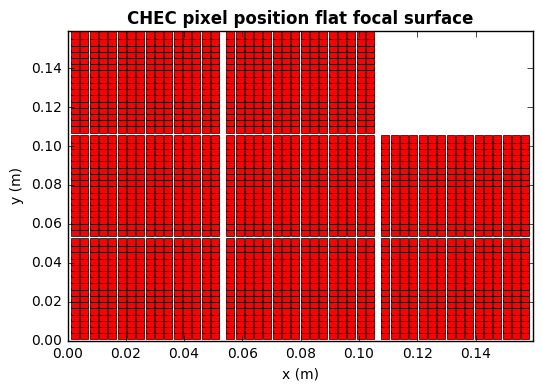

In [6]:
plt.plot(rPixQ[:,:,0],rPixQ[:,:,1],"rs")
plt.xlim([0,rCamMinX + gPixX/2 + gModX/2])
plt.ylim([0,rCamMinY + gPixY/2 + gModY/2])
ax = plt.gca()
ax.set_title("CHEC pixel position flat focal surface", size = 12, weight = "bold")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")

Correct the pixel positions to allow for the curved focal plane

In [7]:
rFP = 1.0
radPixQ = np.zeros((nPixQ,nPixQ))
thetaPixQ = np.zeros((nPixQ,nPixQ))
phiPixQ = np.zeros((nPixQ,nPixQ))
radPixC = np.zeros((nPixQ,nPixQ))
rPixQC = np.zeros((nPixQ,nPixQ,3))
for i in range(0,nPixQ):
    for j in range(0,nPixQ):
        radPixQ[i,j] = np.sqrt(rPixQ[i,j,0]**2 + rPixQ[i,j,1]**2)
        thetaPixQ[i,j] = np.arctan(radPixQ[i,j]/rFP)
        phiPixQ[i,j] = np.arccos(rPixQ[i,j,0]/radPixQ[i,j])
        radPixC[i,j] = rFP*np.sin(thetaPixQ[i,j])
        rPixQC[i,j,0] = radPixC[i,j]*np.cos(phiPixQ[i,j])
        rPixQC[i,j,1] = radPixC[i,j]*np.sin(phiPixQ[i,j])
        rPixQC[i,j,2] = rFP*np.cos(thetaPixQ[i,j]) - rFP
print("rPixQ[",iTest,",",jTest,"] is ",rPixQ[iTest,jTest,:])
print("radPixQ[",iTest,",",jTest,"] is ",radPixQ[iTest,jTest])
print("thetaPixQ[",iTest,",",jTest,"] is ",thetaPixQ[iTest,jTest])
print("phiPixQ[",iTest,",",jTest,"] is ",phiPixQ[iTest,jTest])
print("rPixQC[",iTest,",",jTest,"] is ",rPixQC[iTest,jTest])
print("rPixQ[",iTest,",",jTest,"] is ",rPixQ[iTest,jTest])

rPixQ[ 47 , 0 ] is  [ 0.157   0.0026]
radPixQ[ 47 , 0 ] is  0.157021527187
thetaPixQ[ 47 , 0 ] is  0.155749793144
phiPixQ[ 47 , 0 ] is  0.016558995894
rPixQC[ 47 , 0 ] is  [ 0.15509959  0.00256853 -0.0121045 ]
rPixQ[ 47 , 0 ] is  [ 0.157   0.0026]


Plot these positions

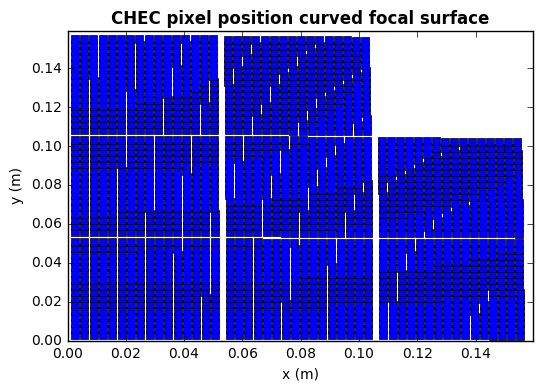

In [8]:
plt.plot(rPixQC[:,:,0],rPixQC[:,:,1],"bs")
plt.xlim([0,rCamMinX + gPixX/2 + gModX/2])
plt.ylim([0,rCamMinY + gPixY/2 + gModY/2])
ax = plt.gca()
ax.set_title("CHEC pixel position curved focal surface", size = 12, weight = "bold")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")

Now plot the flat and curved focal plane results together.

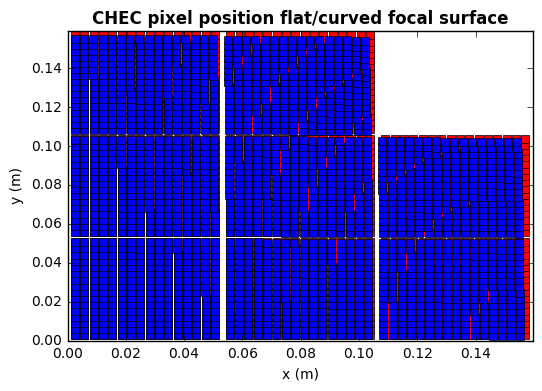

In [9]:
plt.plot(rPixQ[:,:,0],rPixQ[:,:,1],"rs")
plt.plot(rPixQC[:,:,0],rPixQC[:,:,1],"bs")
plt.xlim([0,rCamMinX + gPixX/2 + gModX/2])
plt.ylim([0,rCamMinY + gPixY/2 + gModY/2])
ax = plt.gca()
ax.set_title("CHEC pixel position flat/curved focal surface", size = 12, weight = "bold")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")

Plot x against z position.

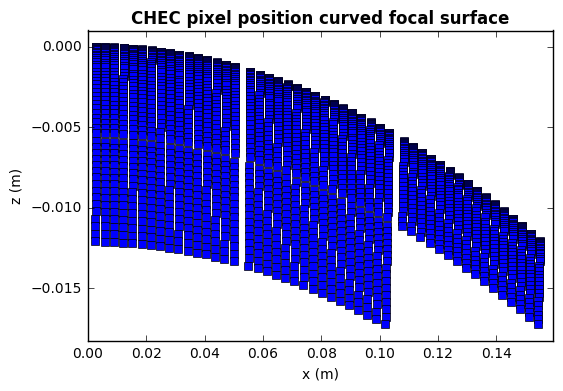

In [10]:
plt.plot(rPixQC[:,:,0],rPixQC[:,:,2],"bs")
plt.xlim([0,rCamMinX + gPixX/2 + gModX/2])
plt.ylim(rPixQC[nPixQ-1,nPixQ-nPixM-1,2] - gPixX/2 - gModX/2,gPixX/2 + gModX/2)
ax = plt.gca()
ax.set_title("CHEC pixel position curved focal surface", size = 12, weight = "bold")
ax.set_xlabel("x (m)")
ax.set_ylabel("z (m)")

Plot x against z position and y against z.

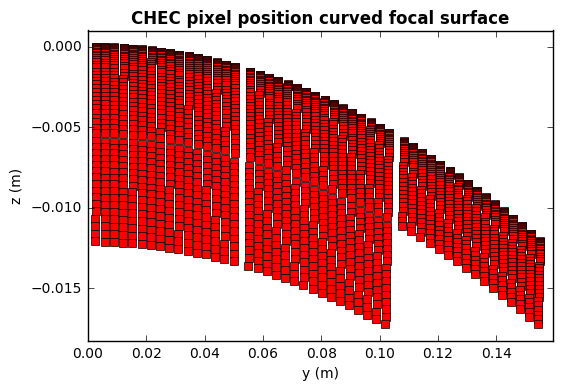

In [11]:
plt.plot(rPixQC[:,:,1],rPixQC[:,:,2],"rs")
plt.xlim([0,rCamMinY + gPixY/2 + gModY/2])
plt.ylim(rPixQC[nPixQ-1,nPixQ-nPixM-1,2] - gPixY/2 - gModY/2,gPixY/2 + gModY/2)
ax = plt.gca()
ax.set_title("CHEC pixel position curved focal surface", size = 12, weight = "bold")
ax.set_xlabel("y (m)")
ax.set_ylabel("z (m)")

Make 3D plot of pixel positions

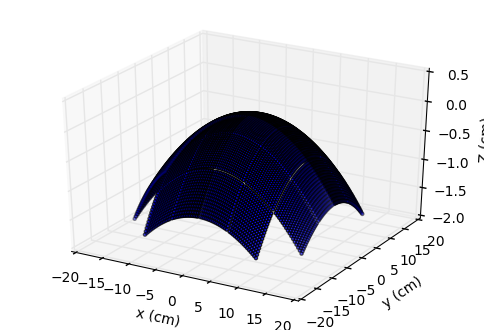

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(100*rPixQC[:,:,0],100*rPixQC[:,:,1],100*rPixQC[:,:,2],c='b',marker='.')
ax.scatter(-100*rPixQC[:,:,0],100*rPixQC[:,:,1],100*rPixQC[:,:,2],c='b',marker='.')
ax.scatter(100*rPixQC[:,:,0],-100*rPixQC[:,:,1],100*rPixQC[:,:,2],c='b',marker='.')
ax.scatter(-100*rPixQC[:,:,0],-100*rPixQC[:,:,1],100*rPixQC[:,:,2],c='b',marker='.')
ax.set_xlabel('x (cm)')
ax.set_ylabel('y (cm)')
ax.set_zlabel('Z (cm)')

Print out table of pixel positions.

In [13]:
print("Sensitive radius along x axis {:.3f}.".format(rPixQC[nPixQ-1,0,0]))
print("Sensitive radius along y axis {:.3f}.".format(rPixQC[0,nPixQ-1,1]))
print("Maximum sensitive radius {:.3f}.".\
      format(np.sqrt(rPixQC[nPixQ-1,nPixQ-nPixM-1,0]**2 + rPixQC[nPixQ-1,nPixQ-nPixM-1,1]**2)))
printout = 0
if printout:
    print("Row \t Col \t x (m) \t y (m) \t z (m)")
    for i in range(0,nPixQ):
        for j in range(0,nPixQ):
            print("{:2d} \t {:2d} \t {:.3f} \t {:.3f} \t {:.3f} ".\
                    format(i+1,j+1,rPixQC[i,j,0],rPixQC[i,j,1],rPixQC[i,j,2]))

Sensitive radius along x axis 0.155.
Sensitive radius along y axis 0.155.
Maximum sensitive radius 0.185.
